In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
options : pd.DataFrame = pd.read_csv("data/cleaned_options_data.csv")
options["day"] = options["ts_recv"].apply(lambda x: x.split("T")[0])

underlying = pd.read_csv("data/underlying_data_hour.csv")
underlying.columns = underlying.columns.str.lower()


/var/folders/1g/l8bcpmkn2hs1dx91vyw0c7pc0000gn/T/ipykernel_3291/3963463140.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  underlying['date'] = pd.to_datetime(underlying['date'])


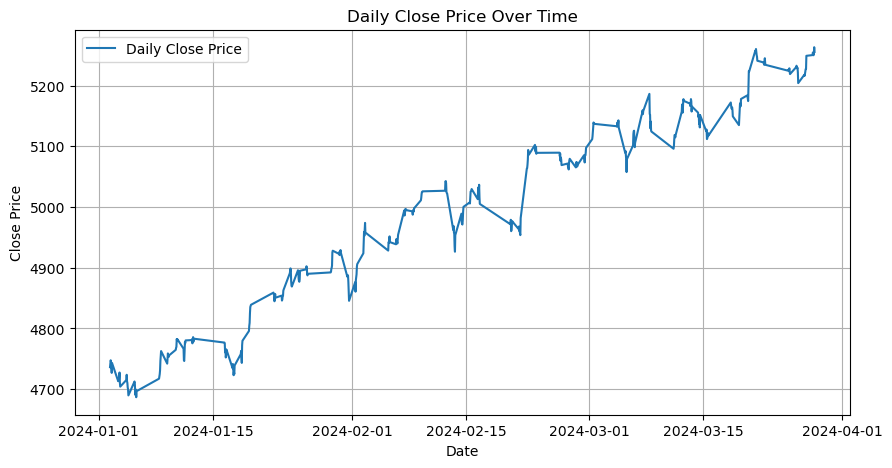

In [14]:
underlying['date'] = pd.to_datetime(underlying['date'])
underlying.set_index('date', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(underlying.index, underlying['close'], label='Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Daily Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
options['ts_recv'] = pd.to_datetime(options['ts_recv'])
options.set_index('ts_recv', inplace=True)
options.sort_index(inplace=True)

In [17]:
options.head()

,instrument_id,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,symbol,day
ts_recv,,,,,,,
2024-01-02 14:30:02.402838204+00:00,587228771,27.0,27.70,174,155,SPX 240119P04700000,2024-01-02
2024-01-02 14:30:02.402844171+00:00,587211744,1.6,1.75,755,1981,SPX 240119P04300000,2024-01-02
2024-01-02 14:30:02.402848382+00:00,587211728,4.1,4.40,1566,1125,SPX 240119P04500000,2024-01-02
2024-01-02 14:30:02.410507796+00:00,587246038,121.1,123.70,15,15,SPX 240216P04850000,2024-01-02
2024-01-02 14:30:02.410507796+00:00,587237433,42.7,43.40,75,120,SPX 240216P04650000,2024-01-02


In [11]:
row = options.sample(n=1).iloc[0]
row

ts_recv          2024-01-12T17:27:04.290043178Z
instrument_id                         587230101
bid_px_00                                 247.6
ask_px_00                                 250.3
bid_sz_00                                    98
ask_sz_00                                   104
symbol                    SPX   250117C05000000
day                                  2024-01-12
Name: 183155, dtype: object